# import warnings
warnings.filterwarnings("ignore")

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('df.csv', index_col=0)

In [3]:
df.head()

,date,open,high,low,close,volume,tic,day
0,2010-01-04,7.622500,7.660714,7.585000,6.487535,493729600,AAPL,0
1,2010-01-04,56.630001,57.869999,56.560001,42.146587,5277400,AMGN,0
2,2010-01-04,40.810001,41.099998,40.389999,33.436996,6894300,AXP,0
3,2010-01-04,55.720001,56.389999,54.799999,43.777550,6186700,BA,0
4,2010-01-04,57.650002,59.189999,57.509998,40.732986,7325600,CAT,0


In [4]:
df.tail()

,date,open,high,low,close,volume,tic,day
97008,2023-02-28,482.670013,483.359985,473.920013,472.312012,3902100,UNH,1
97009,2023-02-28,220.000000,221.770004,219.500000,219.100037,5385400,V,1
97010,2023-02-28,38.700001,38.970001,38.549999,37.506733,16685300,VZ,1
97011,2023-02-28,35.480000,35.779999,35.320000,34.379196,8847000,WBA,1
97012,2023-02-28,141.000000,142.649994,140.949997,140.514648,6018000,WMT,1


In [5]:
df.shape

(97013, 8)

In [6]:
len(df.tic.unique())

30

In [7]:
df.tic.value_counts()

tic
AAPL    3311
AMGN    3311
WMT     3311
WBA     3311
VZ      3311
V       3311
UNH     3311
TRV     3311
PG      3311
NKE     3311
MSFT    3311
MRK     3311
MMM     3311
MCD     3311
KO      3311
JPM     3311
JNJ     3311
INTC    3311
IBM     3311
HON     3311
HD      3311
GS      3311
DIS     3311
CVX     3311
CSCO    3311
CRM     3311
CAT     3311
BA      3311
AXP     3311
DOW      994
Name: count, dtype: int64

In [8]:
# import pandas as pd
# import numpy as np
# import networkx as nx
# import matplotlib.pyplot as plt
# %matplotlib inline

# # Assuming your data is in the 'processed' DataFrame
# correlation_matrix = df.pivot(index='date', columns='tic', values='close').corr()

# # Create a graph from the correlation matrix
# G = nx.Graph()
# for stock1 in correlation_matrix.columns:
#     for stock2 in correlation_matrix.columns:
#         if stock1 != stock2 and correlation_matrix[stock1][stock2] > 0.8:  # Threshold of 0.8
#             G.add_edge(stock1, stock2, weight=correlation_matrix[stock1][stock2])

# # Check the number of edges
# num_edges = G.number_of_edges()
# print(num_edges)

# # To visualize or further process the graph, you can use NetworkX functions
# plt.figure(figsize=(12, 8))
# pos = nx.spring_layout(G)  # positions for all nodes
# nx.draw_networkx_nodes(G, pos, node_size=500)
# nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.5)
# nx.draw_networkx_labels(G, pos, font_size=12)
# plt.title("Stock Correlation Graph")
# plt.show()

In [9]:
# print(correlation_matrix)


In [10]:
# from node2vec import Node2Vec
# import os

# # Initialize Node2Vec model
# node2vec = Node2Vec(G, dimensions=64, walk_length=30, num_walks=200, workers=4)

# # Train the model
# model = node2vec.fit(window=10, min_count=1, batch_words=4)

# # Create a directory to store the embeddings
# folder_name = "stock_embeddings"
# if not os.path.exists(folder_name):
#     os.makedirs(folder_name)

# # Save embeddings for each ticker in the folder
# for stock in df['tic'].unique():
#     model.wv.save_word2vec_format(os.path.join(folder_name, f"{stock}_embedding.model"))


In [11]:
from finrl.meta.preprocessor.preprocessors import FeatureEngineer

from finrl.config import (
    INDICATORS
)

fe = FeatureEngineer(use_technical_indicator=True,
                     tech_indicator_list = INDICATORS,
                     use_turbulence=True,
                     user_defined_feature = True)

processed = fe.preprocess_data(df)
processed = processed.copy()
processed = processed.fillna(0)
processed = processed.replace(np.inf,0)

Successfully added technical indicators
Successfully added turbulence index
Successfully added user defined features


/Users/farhan/anaconda3/envs/finrl/lib/python3.10/site-packages/finrl/meta/preprocessor/preprocessors.py:106: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method="ffill").fillna(method="bfill")


In [12]:
processed.head(5)

,date,open,high,low,close,volume,tic,day,macd,boll_ub,boll_lb,rsi_30,cci_30,dx_30,close_30_sma,close_60_sma,turbulence,daily_return
0,2010-01-04,7.622500,7.660714,7.585000,6.487535,493729600,AAPL,0,0.0,6.509001,6.477282,100.0,66.666667,100.0,6.487535,6.487535,0.0,5.496549
1,2010-01-04,56.630001,57.869999,56.560001,42.146587,5277400,AMGN,0,0.0,6.509001,6.477282,100.0,66.666667,100.0,42.146587,42.146587,0.0,5.496549
2,2010-01-04,40.810001,41.099998,40.389999,33.436996,6894300,AXP,0,0.0,6.509001,6.477282,100.0,66.666667,100.0,33.436996,33.436996,0.0,-0.206650
3,2010-01-04,55.720001,56.389999,54.799999,43.777550,6186700,BA,0,0.0,6.509001,6.477282,100.0,66.666667,100.0,43.777550,43.777550,0.0,0.309255
4,2010-01-04,57.650002,59.189999,57.509998,40.732986,7325600,CAT,0,0.0,6.509001,6.477282,100.0,66.666667,100.0,40.732986,40.732986,0.0,-0.069546


In [13]:
processed.tail(5)

,date,open,high,low,close,volume,tic,day,macd,boll_ub,boll_lb,rsi_30,cci_30,dx_30,close_30_sma,close_60_sma,turbulence,daily_return
96014,2023-02-28,482.670013,483.359985,473.920013,472.312012,3902100,UNH,1,-2.985148,500.695680,465.452971,42.520484,-111.921287,13.705072,483.033968,500.489054,39.057448,1.579475
96015,2023-02-28,220.000000,221.770004,219.500000,219.100037,5385400,V,1,-0.501307,233.841764,216.765693,50.986151,-93.476947,11.525054,224.617559,217.549902,39.057448,-0.536112
96016,2023-02-28,38.700001,38.970001,38.549999,37.506733,16685300,VZ,1,-0.356701,40.831740,36.800720,46.456073,-148.254575,23.267346,38.866805,38.020401,39.057448,-0.828815
96017,2023-02-28,35.480000,35.779999,35.320000,34.379196,8847000,WBA,1,-0.203126,35.953852,34.113229,46.115830,-131.320184,24.613759,34.887938,35.957698,39.057448,-0.083386
96018,2023-02-28,141.000000,142.649994,140.949997,140.514648,6018000,WMT,1,-0.137130,146.058033,137.617821,48.541136,-41.681163,7.250607,141.363217,142.696162,39.057448,3.087200


In [14]:
processed.shape

(96019, 18)

In [15]:
# import gensim

# # Load all embeddings into a dictionary
# embeddings_dict = {}
# for stock in processed['tic'].unique():
#     embedding_path = os.path.join("stock_embeddings", f"{stock}_embedding.model")
#     if os.path.exists(embedding_path):
#         embedding_model = gensim.models.KeyedVectors.load_word2vec_format(embedding_path, binary=False)
#         if stock in embedding_model:
#             embeddings_dict[stock] = embedding_model[stock]
#         else:
#             print(f"Embedding for {stock} loaded, but stock key not found in the model!")
#             embeddings_dict[stock] = [0] * 64  # Default value
#     else:
#         print(f"Embedding file for {stock} not found!")
#         embeddings_dict[stock] = [0] * 64  # Default value

# # Create an embeddings DataFrame
# embeddings_df = pd.DataFrame(processed['tic'].unique(), columns=['tic'])
# embeddings_df['embedding'] = embeddings_df['tic'].apply(lambda x: embeddings_dict.get(x, [0] * 64))

# # Split the 'embedding' column into multiple columns
# embeddings_df = pd.concat([embeddings_df['tic'], embeddings_df['embedding'].apply(pd.Series)], axis=1)

# # Merge the embeddings DataFrame with the original 'processed' data
# merged_data = pd.merge(processed, embeddings_df, on='tic', how='left')


In [16]:
# merged_data.head()

In [17]:
# merged_data.tail(5)

In [18]:
# merged_data.shape

In [19]:
# print(merged_data.columns)

In [20]:
# # Save DataFrame to CSV
# merged_data.to_csv('a.csv', index=False)

In [21]:
from finrl.meta.preprocessor.preprocessors import data_split

# TRAIN_START_DATE = '2010-01-04'
# TRAIN_END_DATE = '2020-07-01'
# TRADE_START_DATE = '2021-07-01'
# TRADE_END_DATE = '2023-02-28'

TRAIN_START_DATE = '2010-01-04'
TRAIN_END_DATE = '2019-01-01'
TRADE_START_DATE = '2019-01-01'
TRADE_END_DATE = '2023-02-28'

TEST_START_DATE = '2019-01-01'
TEST_END_DATE = '2023-02-28'

train = data_split(processed, TRAIN_START_DATE,TRAIN_END_DATE)
trade = data_split(processed, TRADE_START_DATE,TRADE_END_DATE)
print(len(train))
print(len(trade))

65656
30334


In [22]:
trade.head()

,date,open,high,low,close,volume,tic,day,macd,boll_ub,boll_lb,rsi_30,cci_30,dx_30,close_30_sma,close_60_sma,turbulence,daily_return
0,2019-01-02,38.722500,39.712502,38.557499,37.943253,148158800,AAPL,2,-1.987463,43.856203,34.927470,37.867366,-91.607978,42.250808,40.624255,45.809946,43.730337,-0.558999
0,2019-01-02,192.520004,193.199997,188.949997,165.993103,3009100,AMGN,2,-1.233400,176.409550,154.811144,49.241503,-31.129940,4.899123,167.332705,167.499353,43.730337,3.374773
0,2019-01-02,93.910004,96.269997,93.769997,89.451683,4175400,AXP,2,-3.307978,106.813214,81.804744,41.204997,-97.832646,26.709417,96.912531,97.463345,43.730337,-0.461112
0,2019-01-02,316.190002,323.950012,313.709991,314.645142,3292200,BA,2,-5.550590,339.116359,287.252033,47.009999,-21.712385,13.611972,314.427161,331.956151,43.730337,2.517487
0,2019-01-02,124.029999,127.879997,123.000000,112.465019,4783200,CAT,2,-0.647397,119.137103,103.780883,48.229092,-5.423862,0.873482,111.992190,114.080711,43.730337,-0.642566


In [23]:
import gym
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from gym import spaces
from gym.utils import seeding
from stable_baselines3.common.vec_env import DummyVecEnv

matplotlib.use("Agg")

# from stable_baselines3.common import logger


class StockTradingEnv(gym.Env):
    """A stock trading environment for OpenAI gym"""

    metadata = {"render.modes": ["human"]}

    def __init__(
        self,
        df,
        stock_dim,
        hmax,
        initial_amount,
        buy_cost_pct,
        sell_cost_pct,
        reward_scaling,
        state_space,
        action_space,
        tech_indicator_list,
        turbulence_threshold=None,
        risk_indicator_col="turbulence",
        make_plots=False,
        print_verbosity=10,
        day=0,
        initial=True,
        previous_state=[],
        model_name="",
        mode="",
        iteration="",
    ):
        self.day = day
        self.df = df
        self.stock_dim = stock_dim
        self.hmax = hmax
        self.initial_amount = initial_amount
        self.buy_cost_pct = buy_cost_pct
        self.sell_cost_pct = sell_cost_pct
        self.reward_scaling = reward_scaling
        self.state_space = state_space
        self.action_space = action_space
        self.tech_indicator_list = tech_indicator_list
        self.action_space = spaces.Box(low=-1, high=1, shape=(self.action_space,))
        self.observation_space = spaces.Box(
            low=-np.inf, high=np.inf, shape=(self.state_space,)
        )
        self.data = self.df.loc[self.day, :]
        self.terminal = False
        self.make_plots = make_plots
        self.print_verbosity = print_verbosity
        self.turbulence_threshold = turbulence_threshold
        self.risk_indicator_col = risk_indicator_col
        self.initial = initial
        self.previous_state = previous_state
        self.model_name = model_name
        self.mode = mode
        self.iteration = iteration
        # initalize state
        self.state = self._initiate_state()

        # initialize reward
        self.reward = 0
        self.turbulence = 0
        self.cost = 0
        self.trades = 0
        self.episode = 0
        # memorize all the total balance change
        self.asset_memory = [self.initial_amount]
        self.rewards_memory = []
        self.actions_memory = []
        self.date_memory = [self._get_date()]
        # self.reset()
        self._seed()

    def _sell_stock(self, index, action):
        def _do_sell_normal():
            if self.state[index + 1] > 0:
                # Sell only if the price is > 0 (no missing data in this particular date)
                # perform sell action based on the sign of the action
                if self.state[index + self.stock_dim + 1] > 0:
                    # Sell only if current asset is > 0
                    sell_num_shares = min(
                        abs(action), self.state[index + self.stock_dim + 1]
                    )
                    sell_amount = (
                        self.state[index + 1]
                        * sell_num_shares
                        * (1 - self.sell_cost_pct)
                    )
                    # update balance
                    self.state[0] += sell_amount

                    self.state[index + self.stock_dim + 1] -= sell_num_shares
                    self.cost += (
                        self.state[index + 1] * sell_num_shares * self.sell_cost_pct
                    )
                    self.trades += 1
                else:
                    sell_num_shares = 0
            else:
                sell_num_shares = 0

            return sell_num_shares

        # perform sell action based on the sign of the action
        if self.turbulence_threshold is not None:
            if self.turbulence >= self.turbulence_threshold:
                if self.state[index + 1] > 0:
                    # Sell only if the price is > 0 (no missing data in this particular date)
                    # if turbulence goes over threshold, just clear out all positions
                    if self.state[index + self.stock_dim + 1] > 0:
                        # Sell only if current asset is > 0
                        sell_num_shares = self.state[index + self.stock_dim + 1]
                        sell_amount = (
                            self.state[index + 1]
                            * sell_num_shares
                            * (1 - self.sell_cost_pct)
                        )
                        # update balance
                        self.state[0] += sell_amount
                        self.state[index + self.stock_dim + 1] = 0
                        self.cost += (
                            self.state[index + 1] * sell_num_shares * self.sell_cost_pct
                        )
                        self.trades += 1
                    else:
                        sell_num_shares = 0
                else:
                    sell_num_shares = 0
            else:
                sell_num_shares = _do_sell_normal()
        else:
            sell_num_shares = _do_sell_normal()

        return sell_num_shares

    def _buy_stock(self, index, action):
        def _do_buy():
            if self.state[index + 1] > 0:
                # Buy only if the price is > 0 (no missing data in this particular date)
                available_amount = self.state[0] // self.state[index + 1]
                # print('available_amount:{}'.format(available_amount))

                # update balance
                buy_num_shares = min(available_amount, action)
                buy_amount = (
                    self.state[index + 1] * buy_num_shares * (1 + self.buy_cost_pct)
                )
                self.state[0] -= buy_amount

                self.state[index + self.stock_dim + 1] += buy_num_shares

                self.cost += self.state[index + 1] * buy_num_shares * self.buy_cost_pct
                self.trades += 1
            else:
                buy_num_shares = 0

            return buy_num_shares

        # perform buy action based on the sign of the action
        if self.turbulence_threshold is None:
            buy_num_shares = _do_buy()
        else:
            if self.turbulence < self.turbulence_threshold:
                buy_num_shares = _do_buy()
            else:
                buy_num_shares = 0
                pass

        return buy_num_shares

    def _make_plot(self):
        plt.plot(self.asset_memory, "r")
        plt.savefig("results/account_value_trade_{}.png".format(self.episode))
        plt.close()

    def step(self, actions):
        self.terminal = self.day >= len(self.df.index.unique()) - 1
        if self.terminal:
            # print(f"Episode: {self.episode}")
            if self.make_plots:
                self._make_plot()
            end_total_asset = self.state[0] + sum(
                np.array(self.state[1 : (self.stock_dim + 1)])
                * np.array(self.state[(self.stock_dim + 1) : (self.stock_dim * 2 + 1)])
            )
            df_total_value = pd.DataFrame(self.asset_memory)
            tot_reward = (
                self.state[0]
                + sum(
                    np.array(self.state[1 : (self.stock_dim + 1)])
                    * np.array(
                        self.state[(self.stock_dim + 1) : (self.stock_dim * 2 + 1)]
                    )
                )
                - self.initial_amount
            )
            df_total_value.columns = ["account_value"]
            df_total_value["date"] = self.date_memory
            df_total_value["daily_return"] = df_total_value["account_value"].pct_change(
                1
            )
            if df_total_value["daily_return"].std() != 0:
                sharpe = (
                    (252 ** 0.5)
                    * df_total_value["daily_return"].mean()
                    / df_total_value["daily_return"].std()
                )
            df_rewards = pd.DataFrame(self.rewards_memory)
            df_rewards.columns = ["account_rewards"]
            df_rewards["date"] = self.date_memory[:-1]
            if self.episode % self.print_verbosity == 0:
                print(f"day: {self.day}, episode: {self.episode}")
                print(f"begin_total_asset: {self.asset_memory[0]:0.2f}")
                print(f"end_total_asset: {end_total_asset:0.2f}")
                print(f"total_reward: {tot_reward:0.2f}")
                print(f"total_cost: {self.cost:0.2f}")
                print(f"total_trades: {self.trades}")
                if df_total_value["daily_return"].std() != 0:
                    print(f"Sharpe: {sharpe:0.3f}")
                print("=================================")

            if (self.model_name != "") and (self.mode != ""):
                df_actions = self.save_action_memory()
                df_actions.to_csv(
                    "results/actions_{}_{}_{}.csv".format(
                        self.mode, self.model_name, self.iteration
                    )
                )
                df_total_value.to_csv(
                    "results/account_value_{}_{}_{}.csv".format(
                        self.mode, self.model_name, self.iteration
                    ),
                    index=False,
                )
                df_rewards.to_csv(
                    "results/account_rewards_{}_{}_{}.csv".format(
                        self.mode, self.model_name, self.iteration
                    ),
                    index=False,
                )
                plt.plot(self.asset_memory, "r")
                plt.savefig(
                    "results/account_value_{}_{}_{}.png".format(
                        self.mode, self.model_name, self.iteration
                    ),
                    index=False,
                )
                plt.close()

            # Add outputs to logger interface
            # logger.record("environment/portfolio_value", end_total_asset)
            # logger.record("environment/total_reward", tot_reward)
            # logger.record("environment/total_reward_pct", (tot_reward / (end_total_asset - tot_reward)) * 100)
            # logger.record("environment/total_cost", self.cost)
            # logger.record("environment/total_trades", self.trades)

            return self.state, self.reward, self.terminal, {}

        else:

            actions = actions * self.hmax  # actions initially is scaled between 0 to 1
            actions = actions.astype(
                int
            )  # convert into integer because we can't by fraction of shares
            if self.turbulence_threshold is not None:
                if self.turbulence >= self.turbulence_threshold:
                    actions = np.array([-self.hmax] * self.stock_dim)
            begin_total_asset = self.state[0] + sum(
                np.array(self.state[1 : (self.stock_dim + 1)])
                * np.array(self.state[(self.stock_dim + 1) : (self.stock_dim * 2 + 1)])
            )
            # print("begin_total_asset:{}".format(begin_total_asset))

            argsort_actions = np.argsort(actions)

            sell_index = argsort_actions[: np.where(actions < 0)[0].shape[0]]
            buy_index = argsort_actions[::-1][: np.where(actions > 0)[0].shape[0]]

            for index in sell_index:
                # print(f"Num shares before: {self.state[index+self.stock_dim+1]}")
                # print(f'take sell action before : {actions[index]}')
                actions[index] = self._sell_stock(index, actions[index]) * (-1)
                # print(f'take sell action after : {actions[index]}')
                # print(f"Num shares after: {self.state[index+self.stock_dim+1]}")

            for index in buy_index:
                # print('take buy action: {}'.format(actions[index]))
                actions[index] = self._buy_stock(index, actions[index])

            self.actions_memory.append(actions)

            # state: s -> s+1
            self.day += 1
            self.data = self.df.loc[self.day, :]
            if self.turbulence_threshold is not None:
                if len(self.df.tic.unique()) == 1:
                    self.turbulence = self.data[self.risk_indicator_col]
                elif len(self.df.tic.unique()) > 1:
                    self.turbulence = self.data[self.risk_indicator_col].values[0]
            self.state = self._update_state()

            end_total_asset = self.state[0] + sum(
                np.array(self.state[1 : (self.stock_dim + 1)])
                * np.array(self.state[(self.stock_dim + 1) : (self.stock_dim * 2 + 1)])
            )
            self.asset_memory.append(end_total_asset)
            self.date_memory.append(self._get_date())
            self.reward = end_total_asset - begin_total_asset
            self.rewards_memory.append(self.reward)
            self.reward = self.reward * self.reward_scaling

        return self.state, self.reward, self.terminal, {}

    def reset(self):
        # initiate state
        self.state = self._initiate_state()

        if self.initial:
            self.asset_memory = [self.initial_amount]
        else:
            previous_total_asset = self.previous_state[0] + sum(
                np.array(self.state[1 : (self.stock_dim + 1)])
                * np.array(
                    self.previous_state[(self.stock_dim + 1) : (self.stock_dim * 2 + 1)]
                )
            )
            self.asset_memory = [previous_total_asset]

        self.day = 0
        self.data = self.df.loc[self.day, :]
        self.turbulence = 0
        self.cost = 0
        self.trades = 0
        self.terminal = False
        # self.iteration=self.iteration
        self.rewards_memory = []
        self.actions_memory = []
        self.date_memory = [self._get_date()]

        self.episode += 1

        return self.state

    def render(self, mode="human", close=False):
        return self.state

    def _initiate_state(self):
        if self.initial:
            # For Initial State
            if len(self.df.tic.unique()) > 1:
                # for multiple stock
                state = (
                    [self.initial_amount]
                    + self.data.close.values.tolist()
                    + [0] * self.stock_dim
                    + sum(
                        [
                            self.data[tech].values.tolist()
                            for tech in self.tech_indicator_list
                        ],
                        [],
                    )
                )
            else:
                # for single stock
                state = (
                    [self.initial_amount]
                    + [self.data.close]
                    + [0] * self.stock_dim
                    + sum([[self.data[tech]] for tech in self.tech_indicator_list], [])
                )
        else:
            # Using Previous State
            if len(self.df.tic.unique()) > 1:
                # for multiple stock
                state = (
                    [self.previous_state[0]]
                    + self.data.close.values.tolist()
                    + self.previous_state[
                        (self.stock_dim + 1) : (self.stock_dim * 2 + 1)
                    ]
                    + sum(
                        [
                            self.data[tech].values.tolist()
                            for tech in self.tech_indicator_list
                        ],
                        [],
                    )
                )
            else:
                # for single stock
                state = (
                    [self.previous_state[0]]
                    + [self.data.close]
                    + self.previous_state[
                        (self.stock_dim + 1) : (self.stock_dim * 2 + 1)
                    ]
                    + sum([[self.data[tech]] for tech in self.tech_indicator_list], [])
                )
        return state

    def _update_state(self):
        if len(self.df.tic.unique()) > 1:
            # for multiple stock
            state = (
                [self.state[0]]
                + self.data.close.values.tolist()
                + list(self.state[(self.stock_dim + 1) : (self.stock_dim * 2 + 1)])
                + sum(
                    [
                        self.data[tech].values.tolist()
                        for tech in self.tech_indicator_list
                    ],
                    [],
                )
            )

        else:
            # for single stock
            state = (
                [self.state[0]]
                + [self.data.close]
                + list(self.state[(self.stock_dim + 1) : (self.stock_dim * 2 + 1)])
                + sum([[self.data[tech]] for tech in self.tech_indicator_list], [])
            )
        return state

    def _get_date(self):
        if len(self.df.tic.unique()) > 1:
            date = self.data.date.unique()[0]
        else:
            date = self.data.date
        return date

    def save_asset_memory(self):
        date_list = self.date_memory
        asset_list = self.asset_memory
        # print(len(date_list))
        # print(len(asset_list))
        df_account_value = pd.DataFrame(
            {"date": date_list, "account_value": asset_list}
        )
        return df_account_value

    def save_action_memory(self):
        if len(self.df.tic.unique()) > 1:
            # date and close price length must match actions length
            date_list = self.date_memory[:-1]
            df_date = pd.DataFrame(date_list)
            df_date.columns = ["date"]

            action_list = self.actions_memory
            df_actions = pd.DataFrame(action_list)
            df_actions.columns = self.data.tic.values
            df_actions.index = df_date.date
            # df_actions = pd.DataFrame({'date':date_list,'actions':action_list})
        else:
            date_list = self.date_memory[:-1]
            action_list = self.actions_memory
            df_actions = pd.DataFrame({"date": date_list, "actions": action_list})
        return df_actions

    def _seed(self, seed=None):
        self.np_random, seed = seeding.np_random(seed)
        return [seed]

    def get_sb_env(self):
        e = DummyVecEnv([lambda: self])
        obs = e.reset()
        return e, obs

In [24]:
# EMBEDDING_DIMENSION = 64  # Dimension of the Node2Vec embeddings
stock_dimension = len(processed.tic.unique())

# state_space = 1 + 2*stock_dimension + EMBEDDING_DIMENSION*stock_dimension + len(INDICATORS)*stock_dimension
state_space = 1 + 2*stock_dimension + len(INDICATORS)*stock_dimension
print(f"Stock Dimension: {stock_dimension}, State Space: {state_space}")

Stock Dimension: 29, State Space: 291


In [25]:
env_kwargs = {
    "hmax": 100,
    "initial_amount": 1000000,
    "buy_cost_pct": 0.001,
    "sell_cost_pct": 0.001,
    "state_space": state_space,
    "stock_dim": stock_dimension,
    "tech_indicator_list": INDICATORS,
    "action_space": stock_dimension,
    "make_plots": True,
    "reward_scaling": 1e-4,
    "print_verbosity":5

}

# research and add "turbulence_threshold": in above

In [26]:
#Establish the training environment using StockTradingEnv() class
e_train_gym = StockTradingEnv(df = train, **env_kwargs)

In [27]:
env_train, _ = e_train_gym.get_sb_env()
print(type(env_train))

<class 'stable_baselines3.common.vec_env.dummy_vec_env.DummyVecEnv'>


/Users/farhan/anaconda3/envs/finrl/lib/python3.10/site-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(


In [28]:
from finrl.agents.stablebaselines3.models import DRLAgent

# Set up the agent using DRLAgent() class using the environment created in the previous part
agent = DRLAgent(env = env_train)

if_using_a2c = False
if_using_ddpg = False
if_using_ppo = False
if_using_td3 = False
if_using_sac = True

# TD-3

In [29]:
from stable_baselines3.common.logger import configure

agent = DRLAgent(env = env_train)
TD3_PARAMS = {"batch_size": 100,
              "buffer_size": 1000000,
              "learning_rate": 0.001}

model_td3 = agent.get_model("td3",model_kwargs = TD3_PARAMS)

if if_using_td3:
  # set up logger
  tmp_path = 'results' + '/td3'
  new_logger_td3 = configure(tmp_path, ["stdout", "csv", "tensorboard"])
  # Set new logger
  model_td3.set_logger(new_logger_td3)

{'batch_size': 100, 'buffer_size': 1000000, 'learning_rate': 0.001}
Using cpu device


/Users/farhan/anaconda3/envs/finrl/lib/python3.10/site-packages/stable_baselines3/common/buffers.py:231: UserWarning: This system does not have apparently enough memory to store the complete replay buffer 2.45GB > 1.79GB
  warnings.warn(


In [30]:
trained_td3 = agent.train_model(model=model_td3,
                             tb_log_name='td3',
                             total_timesteps=50000) if if_using_td3 else None

# try with increasing total_timesteps for better performance

# PPO

In [31]:
agent = DRLAgent(env = env_train)
PPO_PARAMS = {
    "n_steps": 2048,
    "ent_coef": 0.01,
    "learning_rate": 0.00025,
    "batch_size": 128,
}
model_ppo = agent.get_model("ppo",model_kwargs = PPO_PARAMS)

if if_using_ppo:
  # set up logger
  tmp_path = 'results' + '/ppo'
  new_logger_ppo = configure(tmp_path, ["stdout", "csv", "tensorboard"])
  # Set new logger
  model_ppo.set_logger(new_logger_ppo)

{'n_steps': 2048, 'ent_coef': 0.01, 'learning_rate': 0.00025, 'batch_size': 128}
Using cpu device


In [32]:
trained_ppo = agent.train_model(model=model_ppo,
                             tb_log_name='ppo',
                             total_timesteps=50000) if if_using_ppo else None

# DDPG

In [33]:
agent = DRLAgent(env = env_train)
model_ddpg = agent.get_model("ddpg")

if if_using_ddpg:
  # set up logger
  tmp_path = 'results' + '/ddpg'
  new_logger_ddpg = configure(tmp_path, ["stdout", "csv", "tensorboard"])
  # Set new logger
  model_ddpg.set_logger(new_logger_ddpg)

{'batch_size': 128, 'buffer_size': 50000, 'learning_rate': 0.001}
Using cpu device


In [34]:
trained_ddpg = agent.train_model(model=model_ddpg,
                             tb_log_name='ddpg',
                             total_timesteps=50000) if if_using_ddpg else None

# A2C

In [35]:
agent = DRLAgent(env = env_train)
model_a2c = agent.get_model("a2c")

if if_using_a2c:
  # set up logger
  tmp_path = 'results' + '/a2c'
  new_logger_a2c = configure(tmp_path, ["stdout", "csv", "tensorboard"])
  # Set new logger
  model_a2c.set_logger(new_logger_a2c)

{'n_steps': 5, 'ent_coef': 0.01, 'learning_rate': 0.0007}
Using cpu device


In [36]:
trained_a2c = agent.train_model(model=model_a2c,
                             tb_log_name='a2c',
                             total_timesteps=50000) if if_using_a2c else None

# SAC

In [37]:
agent = DRLAgent(env = env_train)
SAC_PARAMS = {
    "batch_size": 128,
    "buffer_size": 1000000,
    "learning_rate": 0.0001,
    "learning_starts": 100,
    "ent_coef": "auto_0.1",
}

model_sac = agent.get_model("sac",model_kwargs = SAC_PARAMS)

if if_using_sac:
  # set up logger
  tmp_path = 'results' + '/sac'
  new_logger_sac = configure(tmp_path, ["stdout", "csv", "tensorboard"])
  # Set new logger
  model_sac.set_logger(new_logger_sac)

{'batch_size': 128, 'buffer_size': 1000000, 'learning_rate': 0.0001, 'learning_starts': 100, 'ent_coef': 'auto_0.1'}
Using cpu device
Logging to results/sac


/Users/farhan/anaconda3/envs/finrl/lib/python3.10/site-packages/stable_baselines3/common/buffers.py:231: UserWarning: This system does not have apparently enough memory to store the complete replay buffer 2.45GB > 1.78GB
  warnings.warn(


In [38]:
trained_sac = agent.train_model(model=model_sac,
                             tb_log_name='sac',
                             total_timesteps=50000) if if_using_sac else None

day: 2263, episode: 5
begin_total_asset: 1000000.00
end_total_asset: 2074280.07
total_reward: 1074280.07
total_cost: 152881.73
total_trades: 54969
Sharpe: 0.574
---------------------------------
| time/              |          |
|    episodes        | 4        |
|    fps             | 71       |
|    time_elapsed    | 126      |
|    total_timesteps | 9056     |
| train/             |          |
|    actor_loss      | 670      |
|    critic_loss     | 57       |
|    ent_coef        | 0.166    |
|    ent_coef_loss   | -56.5    |
|    learning_rate   | 0.0001   |
|    n_updates       | 8955     |
|    reward          | 4.291557 |
---------------------------------
----------------------------------
| time/              |           |
|    episodes        | 8         |
|    fps             | 68        |
|    time_elapsed    | 262       |
|    total_timesteps | 18112     |
| train/             |           |
|    actor_loss      | 291       |
|    critic_loss     | 317       |
|    ent_coef 

# Trading

In [39]:
e_trade_gym = StockTradingEnv(df = trade, **env_kwargs)

In [40]:
trade.head()

,date,open,high,low,close,volume,tic,day,macd,boll_ub,boll_lb,rsi_30,cci_30,dx_30,close_30_sma,close_60_sma,turbulence,daily_return
0,2019-01-02,38.722500,39.712502,38.557499,37.943253,148158800,AAPL,2,-1.987463,43.856203,34.927470,37.867366,-91.607978,42.250808,40.624255,45.809946,43.730337,-0.558999
0,2019-01-02,192.520004,193.199997,188.949997,165.993103,3009100,AMGN,2,-1.233400,176.409550,154.811144,49.241503,-31.129940,4.899123,167.332705,167.499353,43.730337,3.374773
0,2019-01-02,93.910004,96.269997,93.769997,89.451683,4175400,AXP,2,-3.307978,106.813214,81.804744,41.204997,-97.832646,26.709417,96.912531,97.463345,43.730337,-0.461112
0,2019-01-02,316.190002,323.950012,313.709991,314.645142,3292200,BA,2,-5.550590,339.116359,287.252033,47.009999,-21.712385,13.611972,314.427161,331.956151,43.730337,2.517487
0,2019-01-02,124.029999,127.879997,123.000000,112.465019,4783200,CAT,2,-0.647397,119.137103,103.780883,48.229092,-5.423862,0.873482,111.992190,114.080711,43.730337,-0.642566


In [41]:
df_account_value_ppo, df_actions_ppo = DRLAgent.DRL_prediction(
    model=trained_ppo,
    environment = e_trade_gym) if if_using_ppo else [None, None]

df_account_value_ddpg, df_actions_ddpg = DRLAgent.DRL_prediction(
    model=trained_ddpg,
    environment = e_trade_gym) if if_using_ddpg else [None, None]

df_account_value_a2c, df_actions_a2c = DRLAgent.DRL_prediction(
    model=trained_a2c,
    environment = e_trade_gym) if if_using_a2c else [None, None]

df_account_value_td3, df_actions_td3 = DRLAgent.DRL_prediction(
    model=trained_td3,
    environment = e_trade_gym) if if_using_td3 else [None, None]

df_account_value_sac, df_actions_sac = DRLAgent.DRL_prediction(
    model=trained_sac,
    environment = e_trade_gym) if if_using_sac else [None, None]

/Users/farhan/anaconda3/envs/finrl/lib/python3.10/site-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(


hit end!


In [43]:
# df_account_value_ppo.shape
# df_account_value_ddpg.shape
# df_account_value_a2c.shape
# df_account_value_td3.shape
df_account_value_sac.shape

(1046, 2)

In [45]:
# df_account_value_ppo.tail()
# df_account_value_ddpg.tail()
# df_account_value_a2c.tail()
# df_account_value_td3.tail()
df_account_value_sac.tail()

,date,account_value
1041,2023-02-21,1.431293e+06
1042,2023-02-22,1.422719e+06
1043,2023-02-23,1.426739e+06
1044,2023-02-24,1.412906e+06
1045,2023-02-27,1.416077e+06


In [46]:
df_actions_ppo.head()
df_actions_ddpg.head()
df_actions_a2c.head()
df_actions_td3.head()
df_actions_sac.head()

AttributeError: 'NoneType' object has no attribute 'head'

In [47]:
import datetime
from finrl.plot import backtest_stats, backtest_plot, get_daily_return, get_baseline

print("==============Get Backtest Results===========")
now = datetime.datetime.now().strftime('%Y%m%d-%Hh%M')

if if_using_ppo:
  print("\n ppo:")
  perf_stats_all_ppo = backtest_stats(account_value=df_account_value_ppo)
  perf_stats_all_ppo = pd.DataFrame(perf_stats_all_ppo)
  perf_stats_all_ppo.to_csv("./"+"results"+"/perf_stats_all_ppo_"+now+'.csv')

if if_using_ddpg:
  print("\n ddpg:")
  perf_stats_all_ddpg = backtest_stats(account_value=df_account_value_ddpg)
  perf_stats_all_ddpg = pd.DataFrame(perf_stats_all_ddpg)
  perf_stats_all_ddpg.to_csv("./"+"results"+"/perf_stats_all_ddpg_"+now+'.csv')

if if_using_a2c:
  print("\n a2c:")
  perf_stats_all_a2c = backtest_stats(account_value=df_account_value_a2c)
  perf_stats_all_a2c = pd.DataFrame(perf_stats_all_a2c)
  perf_stats_all_a2c.to_csv("./"+"results"+"/perf_stats_all_a2c_"+now+'.csv')

if if_using_td3:
  print("\n atd3:")
  perf_stats_all_td3 = backtest_stats(account_value=df_account_value_td3)
  perf_stats_all_td3 = pd.DataFrame(perf_stats_all_td3)
  perf_stats_all_td3.to_csv("./"+"results"+"/perf_stats_all_td3_"+now+'.csv')

if if_using_sac:
  print("\n sac:")
  perf_stats_all_sac = backtest_stats(account_value=df_account_value_sac)
  perf_stats_all_sac = pd.DataFrame(perf_stats_all_sac)
  perf_stats_all_sac.to_csv("./"+"results"+"/perf_stats_all_sac_"+now+'.csv')

/Users/farhan/anaconda3/envs/finrl/lib/python3.10/site-packages/pyfolio/pos.py:26: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  warnings.warn(


==============Get Backtest Results===========

 sac:
Annual return          0.087425
Cumulative returns     0.416077
Annual volatility      0.231079
Sharpe ratio           0.479203
Calmar ratio           0.244149
Stability              0.511696
Max drawdown          -0.358082
Omega ratio            1.099003
Sortino ratio          0.666185
Skew                        NaN
Kurtosis                    NaN
Tail ratio             0.935256
Daily value at risk   -0.028674
dtype: float64


In [48]:
#baseline stats
print("==============Get Baseline Stats===========")
baseline_df = get_baseline(
        ticker="^DJI",
        start = TRADE_START_DATE,
        end = TRADE_END_DATE)

stats = backtest_stats(baseline_df, value_col_name = 'close')

==============Get Baseline Stats===========
[*********************100%%**********************]  1 of 1 completed
Shape of DataFrame:  (1046, 8)
Annual return          0.086068
Cumulative returns     0.408753
Annual volatility      0.223959
Sharpe ratio           0.481703
Calmar ratio           0.232075
Stability              0.613109
Max drawdown          -0.370862
Omega ratio            1.103011
Sortino ratio          0.667077
Skew                        NaN
Kurtosis                    NaN
Tail ratio             0.955190
Daily value at risk   -0.027788
dtype: float64


In [49]:
print("==============Compare to DJIA===========")
%matplotlib inline

if if_using_td3:
  backtest_plot(df_account_value_td3,
              baseline_ticker = '^DJI',
              baseline_start = TRADE_START_DATE,
              baseline_end = TRADE_END_DATE)

==============Compare to DJIA===========


In [50]:
if if_using_ppo:
  backtest_plot(df_account_value_ppo,
              baseline_ticker = '^DJI',
              baseline_start = TEST_START_DATE,
              baseline_end = TEST_END_DATE)

In [51]:
if if_using_ddpg:
  backtest_plot(df_account_value_ddpg,
              baseline_ticker = '^DJI',
              baseline_start = TEST_START_DATE,
              baseline_end = TEST_END_DATE)

In [52]:
if if_using_a2c:
  backtest_plot(df_account_value_a2c,
              baseline_ticker = '^DJI',
              baseline_start = TEST_START_DATE,
              baseline_end = TEST_END_DATE)

[*********************100%%**********************]  1 of 1 completed
Shape of DataFrame:  (1046, 8)


/Users/farhan/anaconda3/envs/finrl/lib/python3.10/site-packages/finrl/plot.py:67: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  baseline_df = baseline_df.fillna(method="ffill").fillna(method="bfill")
/Users/farhan/anaconda3/envs/finrl/lib/python3.10/site-packages/pyfolio/plotting.py:650: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '8.7%' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  perf_stats.loc[stat, column] = str(np.round(value * 100,


Start date,2019-01-02
End date,2023-02-27
Total months,49
,Backtest
Annual return,8.7%
Cumulative returns,41.6%
Annual volatility,23.1%
Sharpe ratio,0.48
Calmar ratio,0.24
Stability,0.51
Max drawdown,-35.8%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,35.81,2020-02-19,2020-03-23,2020-11-16,194
1,25.61,2021-11-08,2022-09-30,NaT,NaN
2,7.17,2019-04-23,2019-06-03,2019-06-20,43
3,7.13,2019-07-23,2019-08-14,2019-09-11,37
4,5.37,2021-08-27,2021-09-21,2021-10-25,42


/Users/farhan/anaconda3/envs/finrl/lib/python3.10/site-packages/pyfolio/tears.py:925: UserWarning: Passed returns do not overlap with anyinteresting times.
  warnings.warn('Passed returns do not overlap with any'


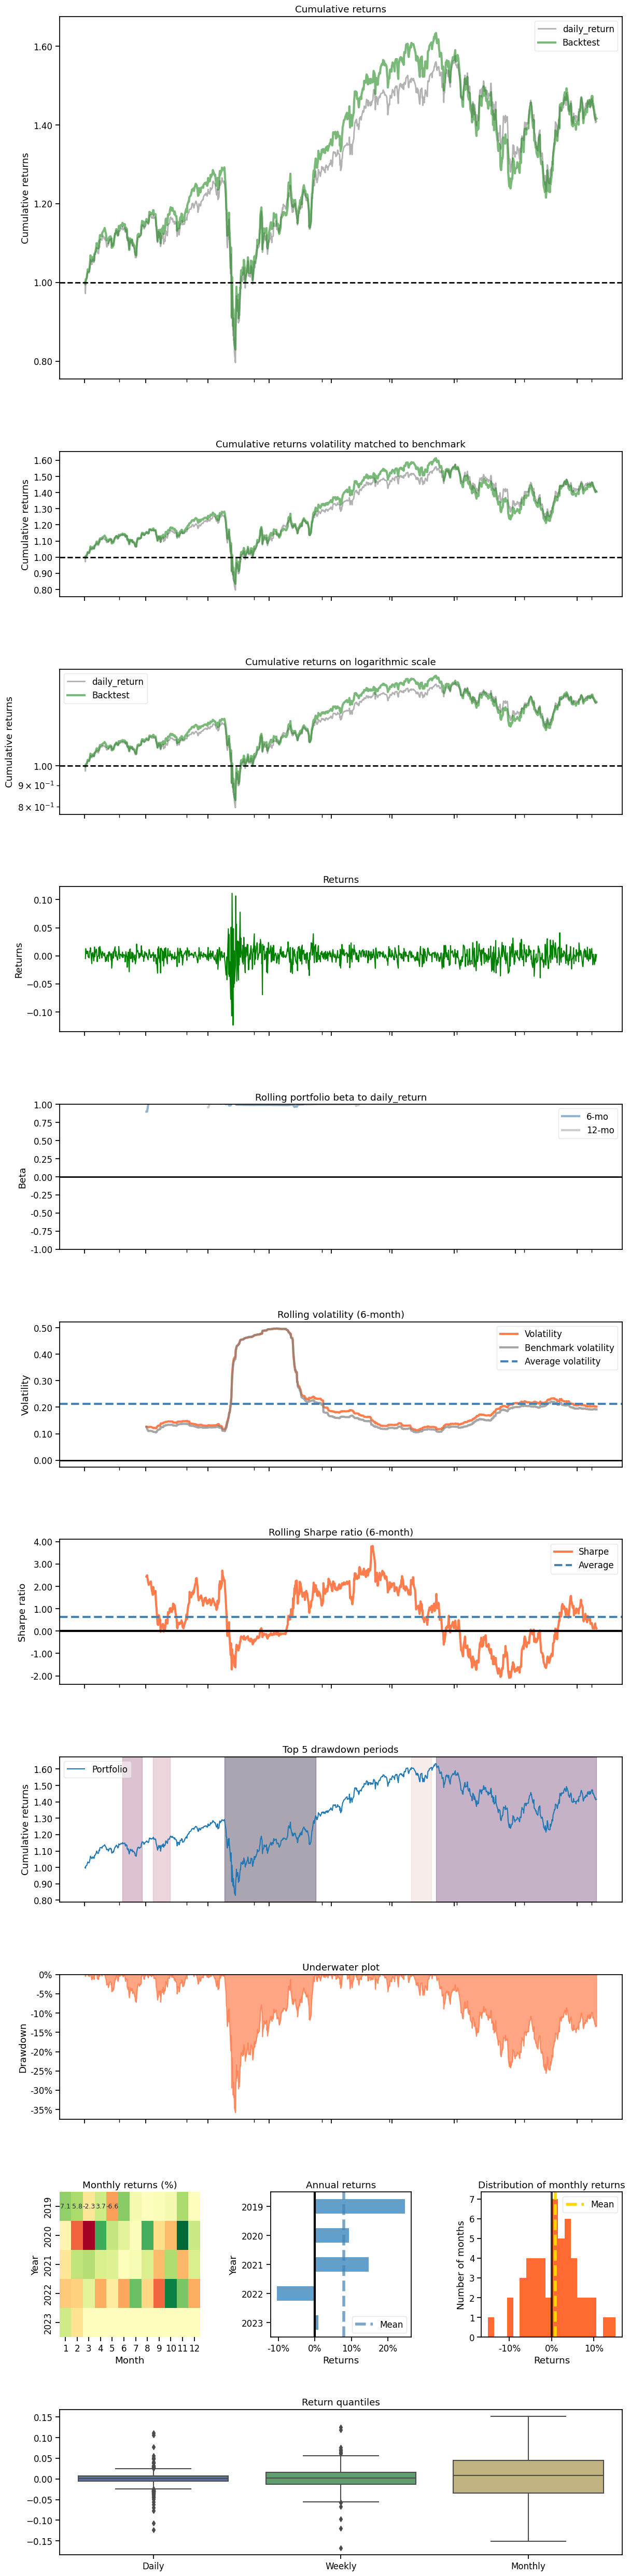

In [53]:
if if_using_sac:
  backtest_plot(df_account_value_sac,
              baseline_ticker = '^DJI',
              baseline_start = TEST_START_DATE,
              baseline_end = TEST_END_DATE)